In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Manipulación de Datos

import numpy as np
import pandas as pd

# Visualización de Datos

import matplotlib.pyplot as plt
import seaborn as sns

# Estadística

from scipy import stats

# Modelos

from sklearn import datasets
from sklearn.datasets import load_iris, make_regression, make_moons

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, log_loss

# Modelos de Machine Learning

## Modelos basados en Árboles

### Árboles de Decision

Son representaciones graficas de las posibles soluciones de una decision basadas en determinadas condiciones.

Se construyen identificando las posibles soluciones o resultados y organizandolos en una estructura en forma de arbol basandose en las condiciones que llevan a los determinados resultados.

## ¿Cuándo debemos emplearlos respecto de los modelos de regresión?

Veamos...

- Los árboles de decisión se emplean cuando queremos ordenar datasets. Tomemos como ejemplo, un caso donde tengamos diferentes tipos de juguetes - coches, muñecas, bloques - y cada tipo va en su propia caja. Los árboles de decisión hacen algo parecido. Ellos ordenan la información en diferentes cajas basándose en cómo es.
- Los modelos de regresión se emplean cuando queremos adivinar un dato. Tomameos como ejemplo, adivinar cuántos caramelos hay en un tarro. Aquí tendremos que mirar cúan grande es el tarro, cúan grandes son los caramelos, ... y hacer una suposición.

En definitiva, los árboles de decisión son para clasificar cosas en grupos, y la regresión es para adivinar números.

**Ejemplo:**

Supongamos un caso de uso, donde tenemos una serie de clientes que han decidido comprar o no un producto. Un árbol de decisión nos podrá permitir entender que características son las que llevan a realizar o no esas compras.

In [5]:
data = {
    "Age": [25, 30, 22, 40, 35, 28, 38, 45, 50, 31],
    "Income": ["Low", "Medium", "Low", "High", "Medium", "Medium", "High", "High", "Medium", "Low"],
    "Buys Product": ["Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "No", "No"]
}

df = pd.DataFrame(data)
df.head(10)

,Age,Income,Buys Product
0,25,Low,Yes
1,30,Medium,Yes
2,22,Low,No
3,40,High,Yes
4,35,Medium,No
5,28,Medium,Yes
6,38,High,Yes
7,45,High,No
8,50,Medium,No
9,31,Low,No


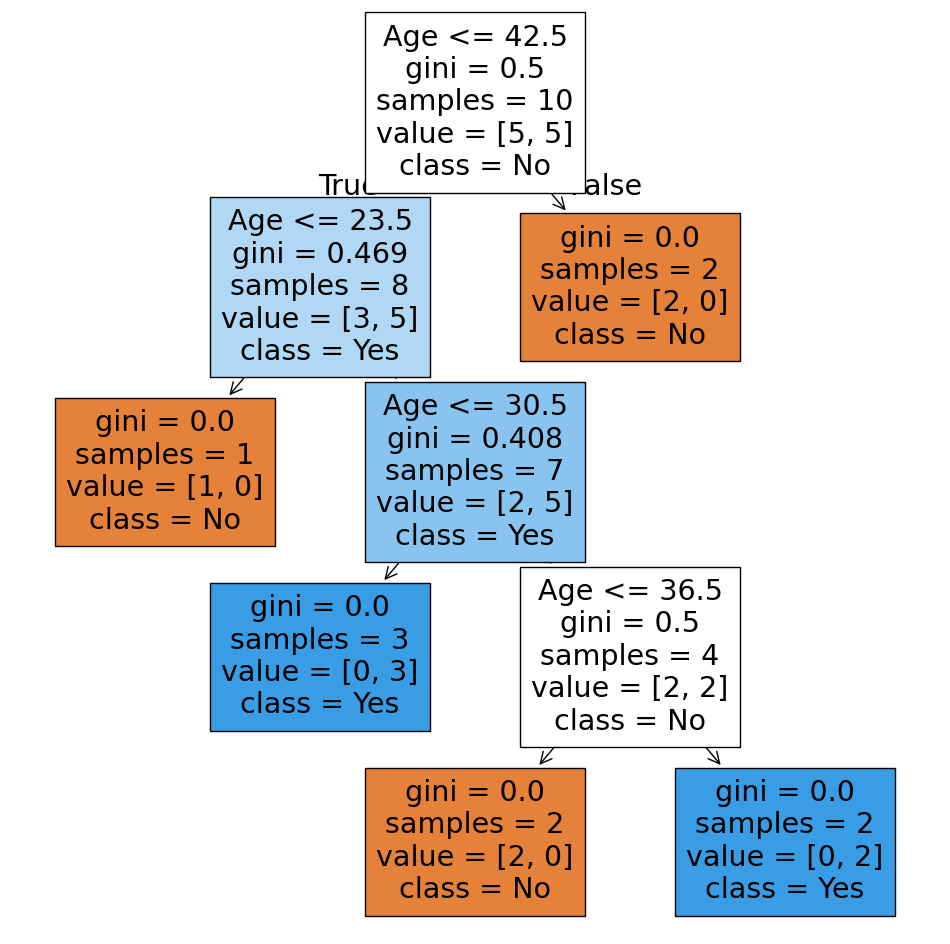

In [7]:
label_encoders = {}
for column in ['Income', 'Buys Product']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop('Buys Product', axis=1)
y = df['Buys Product']

clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(X, y)

fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(model, 
          feature_names=list(X.columns), 
          class_names=["No", "Yes"],  # Asumiendo que "No" es 0 y "Yes" es 1
          filled=True, ax=ax)
plt.show()

In [9]:
importances = model.feature_importances_
features = list(X.columns)

print("Feature Importances:")
for feature, importance in zip(features, importances):
    print(f"- {feature}, Importance: {importance:.4f}")

Feature Importances:
- Age, Importance: 1.0000
- Income, Importance: 0.0000


In [11]:
example_indices = [0, 1, 2]  # You can change these indices to examine other examples
examples = X.iloc[example_indices]

decision_path = model.decision_path(examples)

print("\nDecision Paths for Selected Examples:")
for i, index in enumerate(example_indices):
    print(f"\nDecision path for example {index} (Data: {examples.iloc[i].to_dict()}):\n")
    decision_tree_text = export_text(model, feature_names=features, show_weights=True)
    paths = decision_tree_text.split('\n')
    for decision_step in decision_path.indices[decision_path.indptr[i]:decision_path.indptr[i + 1]]:
        print(paths[decision_step])


Decision Paths for Selected Examples:

Decision path for example 0 (Data: {'Age': 25, 'Income': 1}):

|--- Age <= 42.50
|   |--- Age <= 23.50
|   |--- Age >  23.50
|   |   |--- Age <= 30.50

Decision path for example 1 (Data: {'Age': 30, 'Income': 2}):

|--- Age <= 42.50
|   |--- Age <= 23.50
|   |--- Age >  23.50
|   |   |--- Age <= 30.50

Decision path for example 2 (Data: {'Age': 22, 'Income': 1}):

|--- Age <= 42.50
|   |--- Age <= 23.50
|   |   |--- weights: [1.00, 0.00] class: 0


## ¿Qué indica el parámetro Gini que aparece en el árbol?

Indice de Gini es una medida de impureza o variabilidad utilizada en la construcción del árbol. En el contexto de un árbol de decisión, este índice es una manera de cuantificar qué tan bien una división separa las clases en dos grupos.

Este valor varía entre 0 y 1, donde:
- 0 indica que todos los elementos en el nodo pertenecen a una única clase (pureza total)
- 1 indica una distribución uniforme de las clases en el nodo (máxima impureza)
por lo que un valor bajo de Gini es preferible.

Se calcula tal que:

Gini = 1 - sum(pi^2)

donde pi es la proporcion de la clase en el conjunto de datos de cada nodo que aplicado a nuestro ejemplo anterior en el nodo superior nos daría:

Gini = 1 - (0.6^2 + 0.4^2)
     = 1 - (0.36 + 0.16)
     = 1 - 0.52
     = 0.48

¡Importante! Este parámetro es importante ya que es aquel que suele emplear el algoritmo para crear los distintos nodos de manera que se reduzca lo máximo posible, por eso vemos decisiones como las anteriores.

>|--- Age <= 42.50
>
>|   |--- Age <= 23.50
>
>|   |--- Age >  23.50
>
>|   |   |--- Age <= 30.50

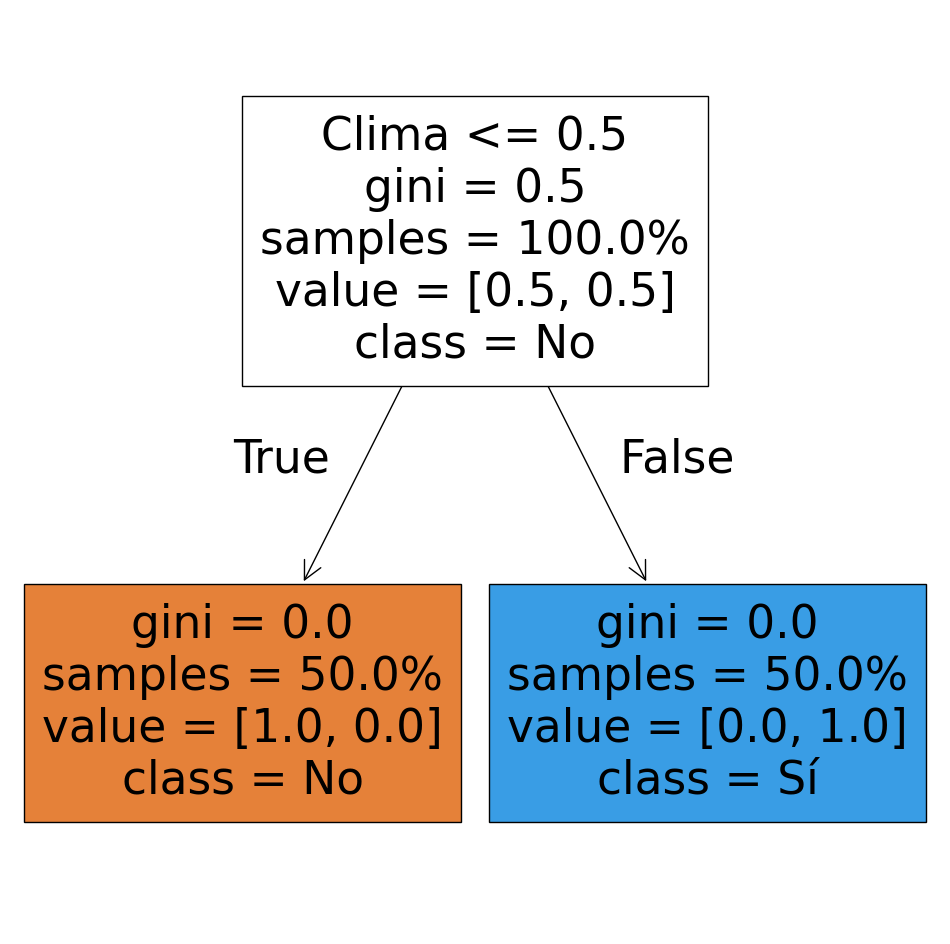

In [7]:
# Creando un conjunto de datos simple para ilustrar la impureza de Gini
data_for_gini = {
    "Clima": ["Soleado", "Soleado", "Lluvioso", "Soleado", "Lluvioso", "Lluvioso", "Soleado", "Lluvioso", "Soleado", "Lluvioso"],
    "Temperatura": ["Caliente", "Templado", "Templado", "Caliente", "Frío", "Frío", "Templado", "Templado", "Caliente", "Frío"],
    "Juega Afuera": ["Sí", "Sí", "No", "Sí", "No", "No", "Sí", "No", "Sí", "No"]
}

df_gini = pd.DataFrame(data_for_gini)

# Codificando variables categóricas para el cálculo de Gini
for column in df_gini.columns:
    df_gini[column] = LabelEncoder().fit_transform(df_gini[column])

df_gini.head(10)

# Construyendo el árbol de decisión para el conjunto de datos de Gini
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
X_gini = df_gini.drop('Juega Afuera', axis=1)
y_gini = df_gini['Juega Afuera']

clf_gini.fit(X_gini, y_gini)

# Visualizando el árbol con los valores de impureza de Gini
fig, ax = plt.subplots(figsize=(12, 12)) # Tamaño de la figura
plot_tree(clf_gini, 
          feature_names=list(X_gini.columns), 
          class_names=["No", "Sí"],
          filled=True, ax=ax,
          proportion=True,
          impurity=True) # Esto muestra la impureza de Gini
plt.show()

¡Cuidado! Al ser el clima un valor de texto, la Clima <= 0.5 es una forma de separar 'Soleado' de las otras categorías.

**Ejercicio:**

- customer_data.csv
- stock_prices_dataset.csv
- loan_data.csv
- medical_data.csv
- audio_features_dataset.csv

Analice razonadamente, ¿cuáles de ellos pueden ser representados cómo Árboles de Decision? Si aplica represente el Arbol de Decision.

**medical_data.csv**

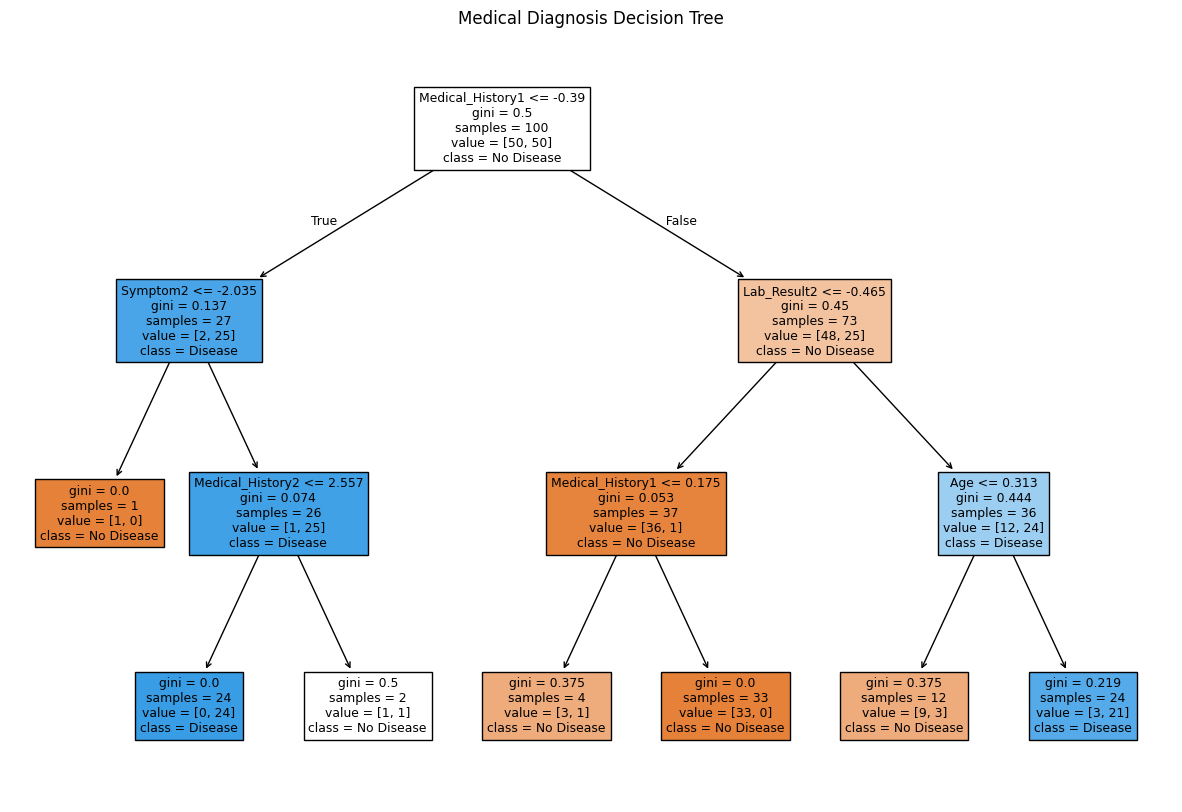

In [8]:
file_path_medical = 'medical_data.csv'
df_medical = pd.read_csv(file_path_medical)
X_medical = df_medical.drop('Diagnosis', axis=1)
y_medical = df_medical['Diagnosis']

medical_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
medical_tree.fit(X_medical, y_medical)

plt.figure(figsize=(15, 10))
plot_tree(medical_tree, feature_names=list(X_medical.columns), class_names=["No Disease", "Disease"], filled=True)
plt.title("Medical Diagnosis Decision Tree")
plt.show()

**loan_data.csv**

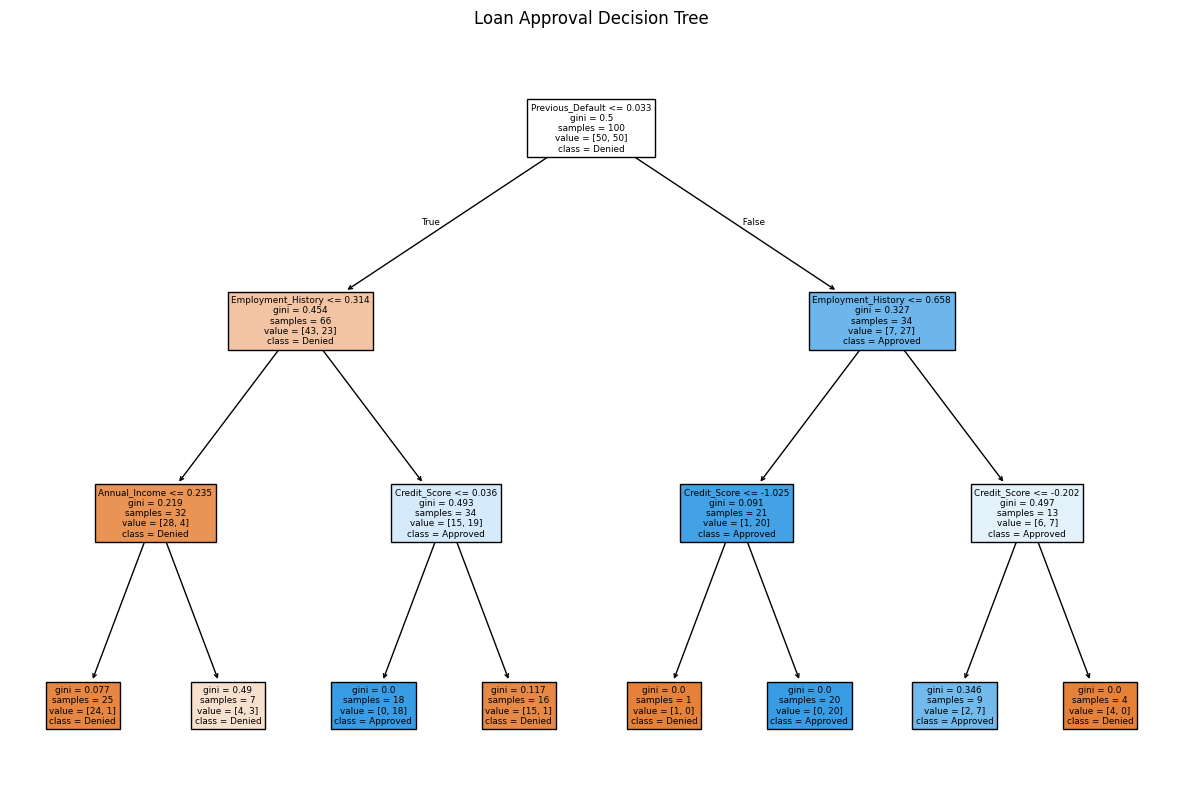

In [9]:
file_path_loan = 'loan_data.csv'
df_loan = pd.read_csv(file_path_loan)
X_loan = df_loan.drop('Loan_Approval', axis=1)
y_loan = df_loan['Loan_Approval']

loan_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
loan_tree.fit(X_loan, y_loan)

plt.figure(figsize=(15, 10))
plot_tree(loan_tree, feature_names=list(X_loan.columns), class_names=["Denied", "Approved"], filled=True)
plt.title("Loan Approval Decision Tree")
plt.show()

**customer_data.csv**

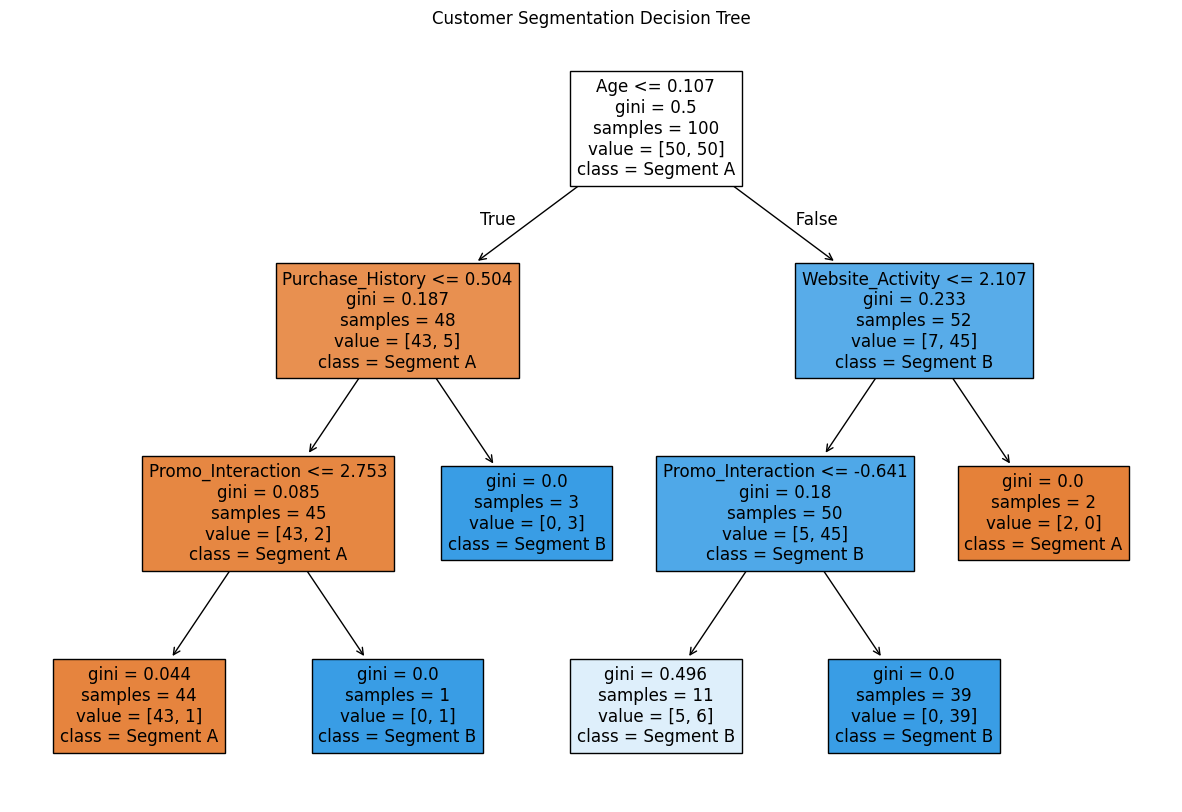

In [10]:
file_path_customer = 'customer_data.csv'
df_customer = pd.read_csv(file_path_customer)
X_customer = df_customer.drop('Customer_Segment', axis=1)
y_customer = df_customer['Customer_Segment']

customer_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
customer_tree.fit(X_customer, y_customer)

plt.figure(figsize=(15, 10))
plot_tree(customer_tree, feature_names=list(X_customer.columns), class_names=["Segment A", "Segment B"], filled=True)
plt.title("Customer Segmentation Decision Tree")
plt.show()

# ¿Qué ocurre si tenemos algún problema más complejo? ¿Podríamos separar nuestro problema en trocitos más pequeños?

Esto es lo que intenta resolver Random Forests. Si tomamos un simil, podríamos ver:

- **Árbol de Decisión Simple** como si intentaras resolver el rompecabezas tú solo. Es más fácil de entender cómo lo haces y puedes explicarlo paso a paso a alguien más. Es bueno si el rompecabezas no es muy complicado y no tienes muchas piezas. Pero a veces, si el rompecabezas es muy difícil, podrías no resolverlo del todo bien.

- **Random Forest (Bosque Aleatorio)** como si un grupo de amigos te ayuda a resolver el rompecabezas. Cada amigo intenta resolver una parte del rompecabezas por su cuenta y luego todos juntos combinan las partes para completarlo. Esto funciona mejor si tienes un rompecabezas muy grande o muy complicado, porque con la ayuda de todos tus amigos es más probable que lo resuelvas correctamente. Pero necesita más tiempo y esfuerzo porque tienes que trabajar con todos tus amigos.

Así que, si el rompecabezas es fácil y quieres hacerlo rápido y entenderlo bien, podrías intentar resolverlo tú solo (Árbol de Decisión). Pero si es muy difícil y quieres hacerlo lo mejor posible, podrías pedir ayuda a tus amigos (Random Forest).

### Random Forests

Formalmente, los Random Forests son una extension de los arboles de decision, donde lo que se hace es construir un bosque de arboles de decision utilizando subconjuntos de datos y caracteristicas aleatoriamente.

A la hora de realizar una prediccion, se toma la media de las decisiones y / o clases de cada uno de los arboles

In [11]:
file_path = 'health_wellness_dataset.csv'

df = pd.read_csv(file_path)

X = df.drop('Recomendación de Consulta', axis=1)
y = df['Recomendación de Consulta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy of Decision Tree: {accuracy_tree}")

Accuracy of Decision Tree: 1.0


In [13]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

y_pred_forest = forest_clf.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Accuracy of Random Forest: {accuracy_forest}")

Accuracy of Random Forest: 0.9666666666666667


In [14]:
file_path_complex = 'complex_health_wellness_dataset.csv'

df_complex = pd.read_csv(file_path_complex)

X_complex = df_complex.drop('Label', axis=1)
y_complex = df_complex['Label']

X_train_complex, X_test_complex, y_train_complex, y_test_complex = train_test_split(X_complex, y_complex, test_size=0.3, random_state=42)

In [15]:
tree_clf_complex = DecisionTreeClassifier(random_state=42)
tree_clf_complex.fit(X_train_complex, y_train_complex)

y_pred_tree_complex = tree_clf_complex.predict(X_test_complex)
accuracy_tree_complex = accuracy_score(y_test_complex, y_pred_tree_complex)
print(f"Accuracy of Decision Tree: {accuracy_tree_complex}")

Accuracy of Decision Tree: 0.85


In [16]:
forest_clf_complex = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf_complex.fit(X_train_complex, y_train_complex)

y_pred_forest_complex = forest_clf_complex.predict(X_test_complex)
accuracy_forest_complex = accuracy_score(y_test_complex, y_pred_forest_complex)
print(f"Accuracy of Random Forest: {accuracy_forest_complex}")

Accuracy of Random Forest: 0.9


**Ejercicio:**

Contexto: Eres un científico de datos que trabaja en una empresa de telecomunicaciones. Tu tarea es predecir si un cliente se dará de baja (churn) en el próximo mes. Se te ha proporcionado un conjunto de datos (telecom_churn_dataset.csv) con información de los clientes, incluyendo su uso del servicio, información demográfica y datos de facturación.

Debes decidir si utilizar un árbol de decisión o un Random Forest para construir un modelo predictivo eficaz y explicar por qué elegiste ese enfoque.

Objetivos del Ejercicio:

- Explorar y analizar el conjunto de datos.
- Construir un modelo de árbol de decisión y un modelo Random Forest.
- Evaluar el rendimiento de ambos modelos.
- Decidir cuál modelo es mejor para predecir la baja de clientes y justificar tu elección.

Notese: Hay datos faltantes, por lo que debería buscar cómo sustituir nuestros datos faltantes en el dataset.

In [17]:
# Asumiendo que el archivo está guardado en la ruta especificada
file_path = 'telecom_churn_dataset.csv'
df = pd.read_csv(file_path)

# Separar las características y la etiqueta
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Evaluar el árbol de decisión
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Exactitud del Árbol de Decisión: {accuracy_tree:.2f}")

Exactitud del Árbol de Decisión: 0.89


Si analizamos vemos que nuestro dataset tiene datos faltantes.

**¿Cómo puedo elegir la mejor estrategia para seleccionar los datos faltantes?**

A continuación, les presento una guía con las estategias más adecuadas:

1. Comprender la naturaleza de los datos faltantes

- Completamente al Azar (MCAR, por sus siglas en inglés): La probabilidad de que un dato falte es la misma para todas las observaciones.
- Al Azar (MAR, por sus siglas en inglés): La probabilidad de que un dato falte está relacionada con alguna de las otras variables en el conjunto de datos.
- No al Azar (MNAR, por sus siglas en inglés): La probabilidad de que un dato falte está relacionada con la variable que falta.

2. Estrategias de Imputación
- Media: Útil cuando los datos faltantes son MCAR y la variable es numérica. La media es sensible a los valores atípicos.
- Mediana: Apropiada para datos numéricos, especialmente cuando hay valores atípicos que pueden distorsionar la media.
- Moda (o Frecuencia más alta): Adecuada para variables categóricas o cuando los datos son discretos. También se puede usar con datos numéricos, pero es menos común.
- Valor Constante: Puede ser útil si el valor faltante en sí mismo tiene un significado, como 'Desconocido' o 'No aplicable'.
- Métodos basados en Modelos (como K-NN, regresión, etc.): Estos son más complejos y utilizan patrones en los datos para estimar los valores faltantes. Son útiles cuando los datos son MAR o MNAR.

3. Consideraciones Adicionales

- Tipo de Datos: Si los datos son numéricos, continuos o discretos, o si son categóricos, esto influirá en tu elección de estrategia de imputación.
- Distribución de los Datos: Si los datos están sesgados o contienen muchos valores atípicos, la mediana puede ser preferible a la media.
- Importancia de la Precisión: En algunos casos, como en la investigación médica, es mejor no imputar y manejar los datos faltantes de otra manera, ya que la imputación incorrecta puede llevar a conclusiones erróneas.
- Cantidad de Datos Faltantes: Si una gran proporción de los datos en una variable está faltando, puede ser mejor considerar la eliminación de esa variable.

Una vez dicho todo lo anterior, tambien es cierto que la  estrategia de imputación puede requerir un enfoque de prueba y error.

In [18]:
# Crear un imputador que reemplace los valores NaN con la mediana de la columna
imputer = SimpleImputer(strategy='median')

In [19]:
# Crear un pipeline con el imputador y el Random Forest
pipeline = make_pipeline(imputer, RandomForestClassifier(random_state=42))

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Evaluar el modelo
y_pred_forest = pipeline.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Exactitud: {accuracy_forest:.2f}")

Exactitud: 0.94


En conclusión:
- Si la exactitud del Random Forest es significativamente más alta, esto indica que el modelo pudo manejar mejor la complejidad y las interacciones entre las características.
- Si no hay una gran diferencia o si el árbol de decisión tiene un rendimiento similar, podríamos considerar la simplicidad del árbol de decisión como una ventaja, especialmente en términos de interpretabilidad.

## Modelos de Ensamble y Máquinas de Soporte Vectorial (SVM)

Estos modelos consisten en la combinación de varios modelos para resolver un problema en particular, siendo los más populares:
* Bagging, que consiste en separar los datos de una manera especial para poder entrenar el modelo con diversos subconjuntos.
* Boosting, que consiste en entrenar nuestro modelo de forma iterativa priorizando las instancias previamente mal clasificadas
* Stacking, que consiste en generar un metamodelo que se alimente los resultados de modelos de diferentes tipos para dar una prediccion final

### Maquinas de Soporte Vectorial

Son un conjunto de algoritmos cuyo principal uso son los problemas de clasificacion binaria.

Su estrategia es simple. Estos algoritmos intentan encontrar el hiper plano que tenga la mayor separacion respect de los puntos de las distintas clases.

**Ejemplo:**

Imaginemos que estamos aprendiendo a diferenciar entre diferentes tipos de frutas.

Inicialmente, hablamos sobre **modelos de regresión**. Aquí, podríamos sobre simplificarlo en que solo mirabamos el tamaño de una fruta para decidir si esta debia ser una naranja o una manzana, lo cuál es útil pero a veces no es suficiente porque algunas frutas pueden ser del mismo tamaño.

Despues, hablamos sobre **árboles de decisión**. Aquí, no solo mirabamos el tamaño, sino también el color, la forma, y otras características para tomar tu decisión. Esto es más detallado que solo mirar el tamaño y funciona mejor en muchos casos.

Ahora, vamos a dar un paso más, con las **Máquinas de Soporte Vectorial (SVM)**. Imagina que tienes un montón de manzanas y naranjas en una mesa y quieres separarlas. Algunas manzanas están muy cerca de las naranjas, y no es tan fácil decidir.

Las SVM nos permiten dibujar la mejor línea o curva posible en la mesa que separa las manzanas de las naranjas, asegurándose de que haya el mayor espacio posible entre las dos frutas en la línea.

A nivel de funcionamiento son mejores que los anteriores modelos, ya que no solo mira las características individuales, sino que encuentra la mejor manera de separar los tipos de frutas, incluso cuando las diferencias no son tan claras. Es como tener una regla mágica que te dice exactamente dónde poner la línea para que las manzanas estén de un lado y las naranjas del otro.

Vamos a ver un ejemplo con el dataset del Iris

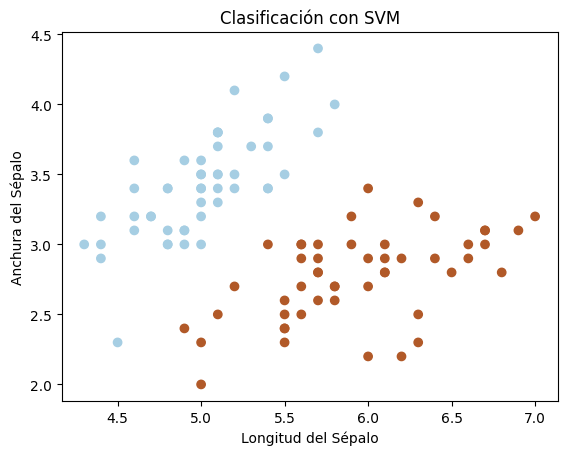

In [20]:
# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usamos solo las primeras dos características
y = iris.target

# Filtramos solo dos tipos de flores para simplificar
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Crear y entrenar el modelo SVM
svm = SVC(kernel='linear')  # Usamos un kernel lineal
svm.fit(X, y)

# Visualizar la separación
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Anchura del Sépalo')
plt.title('Clasificación con SVM')
plt.show()

separando dos tipos de flores de manera eficiente, ¡como si estuvieras dibujando la línea perfecta entre manzanas y naranjas!

Veamos otro ejemplo, a continuación cargaremos un dataset de datos sintético que representa a diferentes clientes con algunas de sus características como su ingreso anual y su puntaje crediticeo.

Ahora, vamos a emplear un SVM para clasificar a los clientes en dos grupos: aquellos a quienes se les debe otorgar crédito y aquellos a quienes no.

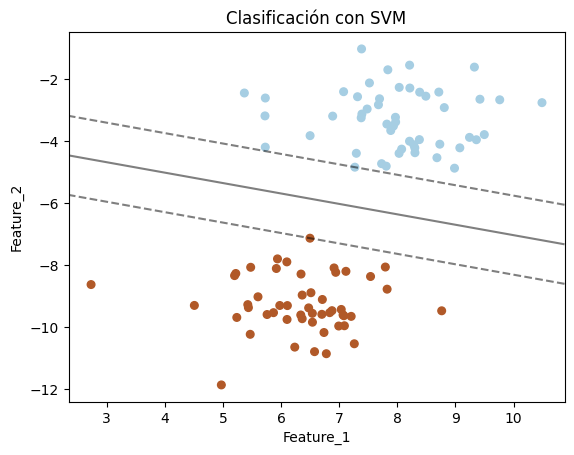

In [21]:
# Cargar el dataset
file_path = 'svm_credit_data.csv'
df = pd.read_csv(file_path)

# Separar las características y la etiqueta
X = df[['Feature_1', 'Feature_2']]
y = df['Target']

# Crear y entrenar el modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

# Visualizar la clasificación
plt.scatter(X['Feature_1'], X['Feature_2'], c=y, s=30, cmap=plt.cm.Paired)

# Crear una malla para visualizar el hiperplano de separación
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# Hacer predicciones sobre la malla
Z = svm_model.decision_function(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['Feature_1', 'Feature_2']))
Z = Z.reshape(xx.shape)

# Dibujar el hiperplano y los márgenes
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title('Clasificación con SVM')
plt.show()